In [1]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [15]:
#Normalize image pixel values.
x_train = x_train.reshape(-1, 28, 28, 1)/255
x_test = x_test.reshape(-1, 28, 28, 1)/255

In [16]:
model=keras.Sequential() #Create a network sequence.

model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               524416    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                      

In [17]:
#model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
model.compile(optimizer='Adam',loss="sparse_categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test, y_test))



Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6631 - accuracy: 0.7800 - val_loss: 0.3133 - val_accuracy: 0.9023
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2452 - accuracy: 0.9256 - val_loss: 0.1622 - val_accuracy: 0.9496
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1520 - accuracy: 0.9535 - val_loss: 0.1179 - val_accuracy: 0.9638
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1107 - accuracy: 0.9658 - val_loss: 0.0834 - val_accuracy: 0.9732
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0884 - accuracy: 0.9726 - val_loss: 0.0810 - val_accuracy: 0.9737
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0733 - accuracy: 0.9767 - val_loss: 0.0657 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0635 - accuracy: 0.9797 - val_loss: 0.0611 - val_accurac

In [18]:
score = model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9802


In [19]:
y_pred=model.predict(x_test)
y_pred.shape

313/313 [==============================] - 1s 2ms/step


(10000, 10)

In [20]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)

In [21]:
from sklearn.metrics import accuracy_score,  confusion_matrix
print(confusion_matrix(y_test,y_pred1))

accuracy_score(y_test,y_pred1)*100

[[ 978    0    1    0    0    0    1    0    0    0]
 [   0 1128    1    1    0    1    1    1    2    0]
 [   2    0 1022    3    0    0    0    4    1    0]
 [   1    0    0 1003    0    2    0    2    2    0]
 [   1    1    2    2  911    1    4    2    1   57]
 [   2    0    0    8    0  876    2    0    2    2]
 [   7    2    0    1    1    3  941    0    3    0]
 [   0    2    8    1    0    1    0 1007    1    8]
 [   8    0    4   10    0    3    0    3  939    7]
 [   0    2    0    5    1    2    0    2    0  997]]


98.02

[3.16415549e-06 1.23680536e-07 4.24319260e-05 1.14247836e-04
 3.06675019e-09 1.74317822e-08 2.48463563e-15 9.99824941e-01
 5.74761884e-07 1.45376489e-05]
7


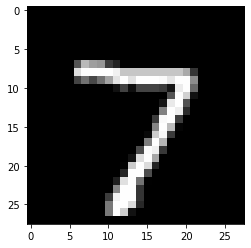

In [22]:
plt.imshow(x_test[0],cmap="gray")
print(y_pred[0])
print(y_pred1[0])

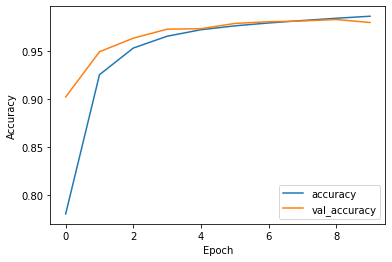

In [23]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')